In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm 
import os

In [2]:
path = "../data/nonlinear/"

In [3]:
paths = [path + x for x in os.listdir(path)]

In [4]:
paths

['../data/nonlinear/data_G_dropped_samples_pca_99_lle.npy',
 '../data/nonlinear/mask_data_G_pca_99_isomap.npy',
 '../data/nonlinear/data_G_dropped_samples_pca_99_isomap.npy',
 '../data/nonlinear/data_O_pca_99_lle.npy',
 '../data/nonlinear/mask_data_G_pca_99_lle.npy',
 '../data/nonlinear/data_G_pca_99_lle.npy',
 '../data/nonlinear/data_O_pca_99_isomap.npy',
 '../data/nonlinear/data_F_dropped_samples_pca_99_isomap.npy',
 '../data/nonlinear/data_G_pca_99_moified_lle.npy',
 '../data/nonlinear/mask_data_G_pca_99_moified_lle.npy',
 '../data/nonlinear/mask_data_G_dropped_samples_pca_99_isomap.npy',
 '../data/nonlinear/data_F_dropped_samples_pca_99_moified_lle.npy',
 '../data/nonlinear/mask_data_G_dropped_samples_pca_99_lle.npy',
 '../data/nonlinear/data_F_pca_99_moified_lle.npy',
 '../data/nonlinear/data_F_dropped_samples_pca_99_lle.npy',
 '../data/nonlinear/data_G_pca_99_isomap.npy',
 '../data/nonlinear/data_O_pca_99_moified_lle.npy',
 '../data/nonlinear/data_F_pca_99_isomap.npy',
 '../data/

In [5]:
datasets = [np.load(path) for path in paths]

## Clustering

In [6]:
from scipy.spatial import distance

def DB_index(X, clusters_centers, labels):
    if -1 in labels:
        X = X[labels != -1]
        labels = labels[labels != -1]
        
        #print(len(labels), X.shape)
        
        
    n_clusters = len(clusters_centers)
    
    d = np.array([distance.euclidean(X[i], clusters_centers[labels[i]]) for i in range(len(X))])
    
    mean_dist = np.zeros(n_clusters)
    for i in range(n_clusters):
        mean_dist[i] = d[labels == i].mean()
    
    return sum([max([(mean_dist[i] + mean_dist[j]) / distance.euclidean(clusters_centers[i], clusters_centers[j]) 
         for i in range(n_clusters) if i != j]) for j in range(n_clusters)]) / n_clusters

In [7]:
def cl_centers(X, pred, n_cl=None):
    if n_cl is None:
        n_cl = len(set(pred))
        if -1 in pred:
            n_cl -= 1
        
    centers = np.zeros((n_cl, X.shape[1]))
    
    for i in range(n_cl):
        centers[i] = X[pred == i].mean(0)
        
    return centers

In [8]:
from sklearn.metrics import calinski_harabaz_score, silhouette_score

In [9]:
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering

In [13]:
all_dbscan_indexes = []
for dataset, label in zip(datasets, paths):
    print(label.split("/")[-1].split(".")[0])
    indexes = []
    for eps in tqdm.tqdm_notebook(np.linspace(0.01, 0.2, 10)):
        dbscan = DBSCAN(eps)
        #dbscan.fit(dataset)
        pred = dbscan.fit_predict(dataset)
        if max(pred) > 0:
            centers = cl_centers(dataset, pred)

            ind = DB_index(dataset, centers, pred)
#             print("shape: ", dataset.shape)
#             print("dbscan eps: ", eps)
#             print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
#             print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
            print(dataset.shape)
            print(eps)
            print(ind)
            print(silhouette_score(dataset, pred))
            print((pred != -1).sum())
            print(1+max(pred))
            indexes.append(ind)
        else:
            indexes.append(-1)
    
    all_dbscan_indexes.append(indexes)

data_G_dropped_samples_pca_99_lle


A Jupyter Widget

(2382, 9)
0.01
0.5671158648436241
-0.16358519840285515
1752
22
(2382, 9)
0.03111111111111111
0.44988072905178994
0.5321869154397283
2291
7
(2382, 9)
0.052222222222222225
0.3005729398882638
0.6560844583123684
2346
4
(2382, 9)
0.07333333333333333
0.23121859103719725
0.7911337200669827
2374
2
(2382, 9)
0.09444444444444444
0.2325010487072367
0.809413642145172
2378
2
(2382, 9)
0.11555555555555555
0.2325010487072367
0.809413642145172
2378
2
(2382, 9)
0.1366666666666667
0.23309508317329466
0.8117435694271558
2380
2
(2382, 9)
0.1577777777777778
0.23309508317329466
0.8117435694271558
2380
2
(2382, 9)
0.1788888888888889
0.23355856617347742
0.8105363793312694
2381
2
(2382, 9)
0.2
0.23407714657157896
0.8116243765042418
2382
2

data_G_dropped_samples_pca_99_isomap


A Jupyter Widget

(2382, 9)
0.03111111111111111
0.2662739458233526
0.12508862762581602
47
6
(2382, 9)
0.052222222222222225
0.11111205833016677
-0.10073766506741104
81
9
(2382, 9)
0.07333333333333333
0.28712715364165586
-0.1558626286839485
183
17
(2382, 9)
0.09444444444444444
0.312183645145774
-0.19527664034100475
292
23
(2382, 9)
0.11555555555555555
0.44766678039631824
-0.24883573435432144
433
29
(2382, 9)
0.1366666666666667
0.41975343252609965
-0.21698717271909285
598
35
(2382, 9)
0.1577777777777778
0.6897887670504843
-0.1394125882676204
935
47
(2382, 9)
0.1788888888888889
0.9791291881733578
-0.14087003560753056
1326
47
(2382, 9)
0.2
0.9653436574145651
-0.1816336630818689
1677
30

data_O_pca_99_lle


A Jupyter Widget

(4249, 7)
0.01
0.7873048888810831
-0.13569119768728996
3654
21
(4249, 7)
0.03111111111111111
0.3736006680974778
0.6571384599310989
4236
3

data_G_pca_99_lle


A Jupyter Widget

(4224, 9)
0.01
0.6692824717969532
-0.1768974122357914
3469
25
(4224, 9)
0.03111111111111111
0.41240085651779784
0.416702052974532
4175
6
(4224, 9)
0.052222222222222225
0.3900699870250867
0.634528381226624
4209
3

data_O_pca_99_isomap


A Jupyter Widget

(4249, 7)
0.01
0.22834818202283477
-0.21098202588288184
97
9
(4249, 7)
0.03111111111111111
0.1410773550498599
-0.2804355495345274
318
14
(4249, 7)
0.052222222222222225
0.20791182061000865
-0.3223514767596113
568
20
(4249, 7)
0.07333333333333333
0.35230625352253164
-0.28210558613436953
844
29
(4249, 7)
0.09444444444444444
0.47143051553072407
-0.2646089066981579
1187
45
(4249, 7)
0.11555555555555555
0.6763243538574867
-0.22744709099221896
1651
70
(4249, 7)
0.1366666666666667
0.7805653952803245
-0.16385245798861986
2217
70
(4249, 7)
0.1577777777777778
0.9568181176162861
-0.20024182032361082
2786
53
(4249, 7)
0.1788888888888889
1.1193226974136625
-0.26990327068317704
3406
36
(4249, 7)
0.2
1.0393066111081206
-0.23841576485464366
3792
23

data_F_dropped_samples_pca_99_isomap


A Jupyter Widget

(856, 8)
0.03111111111111111
0.011964121379376145
0.2921851706949557
10
2
(856, 8)
0.052222222222222225
0.044341038312199724
0.13449609175882826
29
4
(856, 8)
0.07333333333333333
0.2247432444904017
0.017306499805884477
56
7
(856, 8)
0.09444444444444444
0.1955658597434791
-0.053456628011685645
90
10
(856, 8)
0.11555555555555555
0.36296104375418753
-0.08644738054482835
123
14
(856, 8)
0.1366666666666667
0.2540569361602343
-0.07273946035028679
167
15
(856, 8)
0.1577777777777778
0.3958638458376808
-0.074632761063946
252
21
(856, 8)
0.1788888888888889
0.693534805619899
-0.04043663252617614
365
30
(856, 8)
0.2
0.7635662343152124
0.04996686525848226
469
27

data_G_pca_99_moified_lle


A Jupyter Widget

(4224, 9)
0.01
0.40925511285338745
0.31116382770886214
4057
12
(4224, 9)
0.03111111111111111
0.15754675027984172
0.7776420397409879
4182
5
(4224, 9)
0.052222222222222225
0.17180807406591017
0.852360723316885
4200
4
(4224, 9)
0.07333333333333333
0.3238156449028062
0.8639332480799959
4213
3

data_F_dropped_samples_pca_99_moified_lle


A Jupyter Widget

(856, 8)
0.01
0.6172345744646686
-0.06808517960430771
639
10
(856, 8)
0.03111111111111111
0.33444516667712987
0.5424216853842084
795
5
(856, 8)
0.052222222222222225
0.3189281487945029
0.5781716144537656
818
4
(856, 8)
0.07333333333333333
0.3392186941938469
0.7252544450874705
828
2

data_F_pca_99_moified_lle


A Jupyter Widget

(4273, 8)
0.01
0.5086291186031562
0.17165105596278551
4157
11
(4273, 8)
0.03111111111111111
0.15365255219935522
0.7188766474773461
4265
2
(4273, 8)
0.052222222222222225
0.2167829638993174
0.7207212103816173
4272
2
(4273, 8)
0.07333333333333333
0.21689093162526268
0.8517068254488206
4273
2

data_F_dropped_samples_pca_99_lle


A Jupyter Widget

(856, 8)
0.01
0.47835403004227767
-0.2538771297393307
63
7
(856, 8)
0.03111111111111111
0.6284905365439202
0.08000717111945801
663
10
(856, 8)
0.052222222222222225
0.7569580931599456
0.3344761368898051
808
3

data_G_pca_99_isomap


A Jupyter Widget

(4224, 9)
0.01
0.0063043943081749826
0.14321505485771152
20
2
(4224, 9)
0.03111111111111111
0.029454676090759236
0.03568953532797628
59
5
(4224, 9)
0.052222222222222225
0.20404530579120814
-0.27370757141269997
194
22
(4224, 9)
0.07333333333333333
0.2631362111383128
-0.27506501815775786
334
27
(4224, 9)
0.09444444444444444
0.40005220254890805
-0.3685098285901111
541
47
(4224, 9)
0.11555555555555555
0.5864340909379705
-0.31997507944971115
891
58
(4224, 9)
0.1366666666666667
0.6764594611584706
-0.2770980039736982
1330
74
(4224, 9)
0.1577777777777778
0.8381717744135437
-0.19191103964568837
1922
80
(4224, 9)
0.1788888888888889
1.2084376216868413
-0.26132171022437345
2784
64
(4224, 9)
0.2
1.183687495581881
-0.32524949376592976
3385
39

data_O_pca_99_moified_lle


A Jupyter Widget

(4249, 7)
0.01
0.25511426374500795
0.5689210187618148
4210
4
(4249, 7)
0.03111111111111111
0.24717202513917644
0.8169514871298696
4249
2

data_F_pca_99_isomap


A Jupyter Widget

(4273, 8)
0.01
0.007339161136843154
0.16115019734931316
27
3
(4273, 8)
0.03111111111111111
0.03749783383647945
-0.11989733614350244
142
11
(4273, 8)
0.052222222222222225
0.2590761038095699
-0.22940236191774724
308
21
(4273, 8)
0.07333333333333333
0.39353051062172245
-0.28519299818868465
539
35
(4273, 8)
0.09444444444444444
0.4828433305304306
-0.30371466307986167
786
43
(4273, 8)
0.11555555555555555
0.567718397789674
-0.27921141279978434
1136
55
(4273, 8)
0.1366666666666667
0.7233344616123412
-0.19559876680766597
1640
68
(4273, 8)
0.1577777777777778
1.018419308580263
-0.189238045188389
2400
73
(4273, 8)
0.1788888888888889
1.119983410471696
-0.263005083630556
3045
42
(4273, 8)
0.2
1.213164247212946
-0.24500973497268164
3534
34

data_F_pca_99_lle


A Jupyter Widget

(4273, 8)
0.01
0.8230857843676757
-0.1061227803400943
3772
11
(4273, 8)
0.03111111111111111
0.28586474428835884
0.7245321385992826
4244
2
(4273, 8)
0.052222222222222225
0.277664201051302
0.725849421214607
4260
3
(4273, 8)
0.07333333333333333
0.41326513820099925
0.7389471656427268
4265
2

data_G_dropped_samples_pca_99_moified_lle


A Jupyter Widget

(2382, 9)
0.01
0.1668410368615846
0.7338271393859046
2248
6
(2382, 9)
0.03111111111111111
0.21357717453721947
0.7850049248799631
2346
6
(2382, 9)
0.052222222222222225
0.18369185124388893
0.8614745891179432
2365
4
(2382, 9)
0.07333333333333333
0.24064542560389973
0.8693792839600396
2372
4



In [10]:
d= np.load(paths[-1])

In [11]:
paths[-1]

'../data/nonlinear/data_G_dropped_samples_pca_99_moified_lle.npy'

In [32]:
cl = DBSCAN(0.005)

In [33]:
clusters = cl.fit_predict(d)

In [34]:
from collections import Counter

In [45]:
for eps in np.linspace(0.0001, 0.01, 10):
    cl = DBSCAN(eps)
    clusters = cl.fit_predict(d)
    
    print(Counter(clusters))
    try:
        print(silhouette_score(d, clusters))
    except:
        print()
    print()

Counter({-1: 2399})


Counter({-1: 1833, 1: 424, 4: 13, 10: 9, 12: 9, 3: 8, 11: 8, 2: 7, 6: 7, 19: 7, 8: 6, 16: 6, 13: 6, 15: 6, 17: 6, 0: 5, 9: 5, 14: 5, 5: 5, 7: 5, 21: 5, 22: 5, 20: 5, 18: 4})
-0.549639140739717

Counter({1: 1165, -1: 900, 16: 68, 18: 49, 22: 28, 5: 13, 2: 12, 9: 12, 6: 11, 13: 11, 19: 9, 0: 8, 25: 8, 15: 8, 14: 8, 20: 8, 8: 7, 4: 6, 12: 6, 7: 6, 23: 6, 24: 6, 26: 6, 3: 5, 21: 5, 17: 5, 10: 5, 11: 5, 28: 5, 27: 5, 29: 3})
-0.2257214431145529

Counter({2: 1595, -1: 626, 4: 28, 0: 20, 13: 20, 6: 10, 7: 10, 9: 9, 14: 9, 16: 9, 1: 8, 17: 8, 5: 6, 8: 6, 19: 6, 3: 5, 11: 5, 10: 5, 15: 5, 18: 5, 12: 4})
-0.27339850333384963

Counter({2: 1829, -1: 460, 1: 24, 10: 20, 5: 11, 0: 8, 3: 8, 4: 6, 6: 6, 9: 6, 12: 6, 8: 5, 7: 5, 11: 5})
-0.18915652578883835

Counter({2: 1900, -1: 378, 1: 24, 9: 21, 4: 10, 0: 8, 11: 8, 12: 7, 5: 6, 10: 6, 8: 6, 3: 5, 7: 5, 6: 5, 14: 5, 13: 5})
-0.24159168232961722

Counter({2: 1990, -1: 325, 1: 24, 4: 11, 0: 8, 7: 8, 9: 6, 5: 6, 8: 6, 3: 5, 6: 5, 1

In [40]:
Counter(clusters)

Counter({0: 2399})

In [31]:
silhouette_score(d, clusters)

-0.5306989826078677

In [27]:
all_kmeans_indexes = []
for dataset, label in zip(datasets, paths):
    print(label.split("/")[-1].split(".")[0])
    indexes = []
    for n in tqdm.tqdm_notebook(np.arange(3, 12, 2)):
        kmeans = KMeans(int(n))
        #dbscan.fit(dataset)
        pred = kmeans.fit_predict(dataset)
        if max(pred) > 0:
            centers = cl_centers(dataset, pred)

            ind = DB_index(dataset, centers, pred)
            print("shape: ", dataset.shape)
            print("n_clusters: ", n)
            print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
            print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
            indexes.append(ind)
        else:
            indexes.append(-1)
    
    all_kmeans_indexes.append(indexes)

data_G_dropped_samples_pca_99_lle


A Jupyter Widget

shape:  (2382, 9)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.738519420674361 0.46608318440643387
Classified_samples, classes:  2382 2
shape:  (2382, 9)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.9659964467813552 0.3744059548314445
Classified_samples, classes:  2382 4
shape:  (2382, 9)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.9858247646247901 0.43685241759952104
Classified_samples, classes:  2382 6
shape:  (2382, 9)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.0279020495151723 0.20431171589582986
Classified_samples, classes:  2382 8
shape:  (2382, 9)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.959352461352385 0.20556052430065577
Classified_samples, classes:  2382 10

data_G_dropped_samples_pca_99_isomap


A Jupyter Widget

shape:  (2382, 9)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.4561940138445697 0.22160305829882615
Classified_samples, classes:  2382 2
shape:  (2382, 9)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.45973176011034 0.2326079299420566
Classified_samples, classes:  2382 4
shape:  (2382, 9)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.3375480763365737 0.25807420486591276
Classified_samples, classes:  2382 6
shape:  (2382, 9)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.3950148433040472 0.2532965141981672
Classified_samples, classes:  2382 8
shape:  (2382, 9)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.2894784372563843 0.2675475250500862
Classified_samples, classes:  2382 10

data_O_pca_99_lle


A Jupyter Widget

shape:  (4249, 7)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.7181425394880947 0.15323665847840356
Classified_samples, classes:  4249 2
shape:  (4249, 7)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.3763514955641736 0.24196850513175922
Classified_samples, classes:  4249 4
shape:  (4249, 7)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.199523819797134 0.25668140916197496
Classified_samples, classes:  4249 6
shape:  (4249, 7)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.0430247882686339 0.2648943110245152
Classified_samples, classes:  4249 8
shape:  (4249, 7)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.0351745744660734 0.2900514519522989
Classified_samples, classes:  4249 10

data_G_pca_99_lle


A Jupyter Widget

shape:  (4224, 9)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.3712340059562829 0.32634210555307763
Classified_samples, classes:  4224 2
shape:  (4224, 9)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.401529258979966 0.28163139816490157
Classified_samples, classes:  4224 4
shape:  (4224, 9)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.2050123002279711 0.21985983739043033
Classified_samples, classes:  4224 6
shape:  (4224, 9)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.1708549011345941 0.2224946322492292
Classified_samples, classes:  4224 8
shape:  (4224, 9)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.0787788037866568 0.23114599356063045
Classified_samples, classes:  4224 10

data_O_pca_99_isomap


A Jupyter Widget

shape:  (4249, 7)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.8497848436617856 0.2179835526383547
Classified_samples, classes:  4249 2
shape:  (4249, 7)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.39876073387368 0.27853769761139446
Classified_samples, classes:  4249 4
shape:  (4249, 7)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.1477040429880756 0.3319653307793075
Classified_samples, classes:  4249 6
shape:  (4249, 7)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.062810680437981 0.34462526715790526
Classified_samples, classes:  4249 8
shape:  (4249, 7)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.0742670673606207 0.33283359902382265
Classified_samples, classes:  4249 10

data_F_dropped_samples_pca_99_isomap


A Jupyter Widget

shape:  (856, 8)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.8824432110336027 0.17593351814262942
Classified_samples, classes:  856 2
shape:  (856, 8)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.6305707523272148 0.21192240018069716
Classified_samples, classes:  856 4
shape:  (856, 8)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.2994397481392037 0.2699391468330783
Classified_samples, classes:  856 6
shape:  (856, 8)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.142016290832454 0.3030977467218808
Classified_samples, classes:  856 8
shape:  (856, 8)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.130750230026287 0.3032430856641452
Classified_samples, classes:  856 10

data_G_pca_99_moified_lle


A Jupyter Widget

shape:  (4224, 9)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  0.3724805260913648 0.8607155401795609
Classified_samples, classes:  4224 2
shape:  (4224, 9)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.3840748026174809 0.8024787281744189
Classified_samples, classes:  4224 4
shape:  (4224, 9)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.4483410280217116 0.5917904539669375
Classified_samples, classes:  4224 6
shape:  (4224, 9)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  0.4824584965431444 0.6300487553775964
Classified_samples, classes:  4224 8
shape:  (4224, 9)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.5655034904509653 0.42081228814961663
Classified_samples, classes:  4224 10

data_F_dropped_samples_pca_99_moified_lle


A Jupyter Widget

shape:  (856, 8)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  0.7830404973310437 0.6763092422275222
Classified_samples, classes:  856 2
shape:  (856, 8)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.7570796411847789 0.44840453588654244
Classified_samples, classes:  856 4
shape:  (856, 8)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.718826431331171 0.49321378209235467
Classified_samples, classes:  856 6
shape:  (856, 8)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  0.5674429251631264 0.54781049382771
Classified_samples, classes:  856 8
shape:  (856, 8)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.47399970434717154 0.5697065163622326
Classified_samples, classes:  856 10

data_F_pca_99_moified_lle


A Jupyter Widget

shape:  (4273, 8)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  0.6163206617719043 0.4644923361387352
Classified_samples, classes:  4273 2
shape:  (4273, 8)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.5418267295814111 0.5204397808620541
Classified_samples, classes:  4273 4
shape:  (4273, 8)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.5034675767335076 0.5786740934804742
Classified_samples, classes:  4273 6
shape:  (4273, 8)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  0.4473158275014494 0.6160355573839609
Classified_samples, classes:  4273 8
shape:  (4273, 8)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.4759234957205925 0.5875960343625484
Classified_samples, classes:  4273 10

data_F_dropped_samples_pca_99_lle


A Jupyter Widget

shape:  (856, 8)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.7929780614221638 0.11856260978892338
Classified_samples, classes:  856 2
shape:  (856, 8)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.7010543457426046 0.1445418351667459
Classified_samples, classes:  856 4
shape:  (856, 8)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.3835091992716755 0.1998458813252127
Classified_samples, classes:  856 6
shape:  (856, 8)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.209610310423309 0.2255109087328371
Classified_samples, classes:  856 8
shape:  (856, 8)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.1340002530918385 0.22157010687876735
Classified_samples, classes:  856 10

data_G_pca_99_isomap


A Jupyter Widget

shape:  (4224, 9)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.7734287522023433 0.172545689931599
Classified_samples, classes:  4224 2
shape:  (4224, 9)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.4994627748925518 0.22369455180598724
Classified_samples, classes:  4224 4
shape:  (4224, 9)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.2926599937290721 0.25531608792636024
Classified_samples, classes:  4224 6
shape:  (4224, 9)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.3248702307487181 0.26089913367965256
Classified_samples, classes:  4224 8
shape:  (4224, 9)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.2156635061229397 0.2733844779856851
Classified_samples, classes:  4224 10

data_O_pca_99_moified_lle


A Jupyter Widget

shape:  (4249, 7)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  0.4177033436720908 0.6768472985045265
Classified_samples, classes:  4249 2
shape:  (4249, 7)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.570926311646086 0.4259267589033929
Classified_samples, classes:  4249 4
shape:  (4249, 7)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.5103995163726134 0.5150838059055032
Classified_samples, classes:  4249 6
shape:  (4249, 7)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  0.6022895792932192 0.37231216472594425
Classified_samples, classes:  4249 8
shape:  (4249, 7)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.5909863330963788 0.4219606536233627
Classified_samples, classes:  4249 10

data_F_pca_99_isomap


A Jupyter Widget

shape:  (4273, 8)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.9036949391075322 0.1795310285797375
Classified_samples, classes:  4273 2
shape:  (4273, 8)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.5057953667960762 0.23624993093444085
Classified_samples, classes:  4273 4
shape:  (4273, 8)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.3448374663107903 0.2520414993055777
Classified_samples, classes:  4273 6
shape:  (4273, 8)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.2795676778195548 0.27415124657820183
Classified_samples, classes:  4273 8
shape:  (4273, 8)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.2521808730014703 0.28059165896630944
Classified_samples, classes:  4273 10

data_F_pca_99_lle


A Jupyter Widget

shape:  (4273, 8)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.7555734761800714 0.23948854872235015
Classified_samples, classes:  4273 2
shape:  (4273, 8)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.4259134458703508 0.1456830362295243
Classified_samples, classes:  4273 4
shape:  (4273, 8)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.1435143624748272 0.2133289506763631
Classified_samples, classes:  4273 6
shape:  (4273, 8)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.0519859994509204 0.2470741188180309
Classified_samples, classes:  4273 8
shape:  (4273, 8)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.056595446300786 0.23194604644328778
Classified_samples, classes:  4273 10

data_G_dropped_samples_pca_99_moified_lle


A Jupyter Widget

shape:  (2382, 9)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  0.17075817732296827 0.9300645577385553
Classified_samples, classes:  2382 2
shape:  (2382, 9)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  0.18656713758812782 0.8537904879010986
Classified_samples, classes:  2382 4
shape:  (2382, 9)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  0.24638647908310937 0.8667401542075489
Classified_samples, classes:  2382 6
shape:  (2382, 9)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  0.34202345461104144 0.8286462864135743
Classified_samples, classes:  2382 8
shape:  (2382, 9)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  0.40561434113998546 0.563498401088893
Classified_samples, classes:  2382 10



In [29]:
from sklearn.metrics import euclidean_distances

In [31]:
m =euclidean_distances(d)

In [32]:
plt.imshow()

array([[0.        , 0.21913532, 0.19333949, ..., 0.12400046, 0.12721618,
        0.12447513],
       [0.21913532, 0.        , 0.20378903, ..., 0.17438874, 0.15984958,
        0.17163713],
       [0.19333949, 0.20378903, 0.        , ..., 0.10612997, 0.10450393,
        0.10612492],
       ...,
       [0.12400046, 0.17438874, 0.10612997, ..., 0.        , 0.01530962,
        0.00900815],
       [0.12721618, 0.15984958, 0.10450393, ..., 0.01530962, 0.        ,
        0.0146113 ],
       [0.12447513, 0.17163713, 0.10612492, ..., 0.00900815, 0.0146113 ,
        0.        ]])

In [ ]:
DBSCAN()

In [8]:
all_dbscan_indexes = []
for dataset, label in zip(datasets, paths):
    print(label.split("/")[-1].split(".")[0])
    indexes = []
    for eps in tqdm.tqdm_notebook(np.linspace(0.01, 0.2, 10)):
        dbscan = DBSCAN(eps)
        #dbscan.fit(dataset)
        pred = dbscan.fit_predict(dataset)
        if max(pred) > 0:
            centers = cl_centers(dataset, pred)

            ind = DB_index(dataset, centers, pred)
            print("shape: ", dataset.shape)
            print("dbscan eps: ", eps)
            print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
            print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
            indexes.append(ind)
        else:
            indexes.append(-1)
    
    all_dbscan_indexes.append(indexes)

data_G


A Jupyter Widget

shape:  (14088, 576)
dbscan eps:  0.01
Davies-Bouldin index, silhouette_score:  0.007837463436494224 0.2388370539250808
Classified_samples, classes:  78 5
shape:  (14088, 576)
dbscan eps:  0.03111111111111111
Davies-Bouldin index, silhouette_score:  0.03611876407140753 0.13629311617087564
Classified_samples, classes:  228 12
shape:  (14088, 576)
dbscan eps:  0.052222222222222225
Davies-Bouldin index, silhouette_score:  0.08472070667906421 0.05422039637261241
Classified_samples, classes:  439 20
shape:  (14088, 576)
dbscan eps:  0.07333333333333333
Davies-Bouldin index, silhouette_score:  0.30044525932378274 -0.12468213116815806
Classified_samples, classes:  883 35
shape:  (14088, 576)
dbscan eps:  0.09444444444444444
Davies-Bouldin index, silhouette_score:  0.4893630783076239 -0.16744962943001968
Classified_samples, classes:  1530 46
shape:  (14088, 576)
dbscan eps:  0.11555555555555555
Davies-Bouldin index, silhouette_score:  0.9634052509175983 -0.24927551289203537
Classified_samples,

A Jupyter Widget

shape:  (8056, 522)
dbscan eps:  0.01
Davies-Bouldin index, silhouette_score:  0.008329972547637293 0.26249268310779633
Classified_samples, classes:  56 4
shape:  (8056, 522)
dbscan eps:  0.03111111111111111
Davies-Bouldin index, silhouette_score:  0.21478459001269593 0.10916700716810741
Classified_samples, classes:  157 13
shape:  (8056, 522)
dbscan eps:  0.052222222222222225
Davies-Bouldin index, silhouette_score:  0.085570568109574 0.053068750884886974
Classified_samples, classes:  291 16
shape:  (8056, 522)
dbscan eps:  0.07333333333333333
Davies-Bouldin index, silhouette_score:  0.31713216274842443 -0.084356752358972
Classified_samples, classes:  511 25
shape:  (8056, 522)
dbscan eps:  0.09444444444444444
Davies-Bouldin index, silhouette_score:  0.3733457188125694 -0.09976970225203625
Classified_samples, classes:  827 31
shape:  (8056, 522)
dbscan eps:  0.11555555555555555
Davies-Bouldin index, silhouette_score:  0.5215805067040097 -0.13291722809647719
Classified_samples, classes:

A Jupyter Widget

shape:  (14088, 117)
dbscan eps:  0.01
Davies-Bouldin index, silhouette_score:  0.007824166338605283 0.2419758436444546
Classified_samples, classes:  78 5
shape:  (14088, 117)
dbscan eps:  0.03111111111111111
Davies-Bouldin index, silhouette_score:  0.03690877060743335 0.1389251467023133
Classified_samples, classes:  232 12
shape:  (14088, 117)
dbscan eps:  0.052222222222222225
Davies-Bouldin index, silhouette_score:  0.18885984977961295 0.01010814302934893
Classified_samples, classes:  458 22
shape:  (14088, 117)
dbscan eps:  0.07333333333333333
Davies-Bouldin index, silhouette_score:  0.34201334330355787 -0.13353295783257085
Classified_samples, classes:  933 39
shape:  (14088, 117)
dbscan eps:  0.09444444444444444
Davies-Bouldin index, silhouette_score:  0.5011606919559272 -0.15752472224296116
Classified_samples, classes:  1595 47
shape:  (14088, 117)
dbscan eps:  0.11555555555555555
Davies-Bouldin index, silhouette_score:  0.9794042066658568 -0.33739016876830513
Classified_samples, 

A Jupyter Widget

shape:  (8056, 117)
dbscan eps:  0.01
Davies-Bouldin index, silhouette_score:  0.008319581679358225 0.26580340910775696
Classified_samples, classes:  56 4
shape:  (8056, 117)
dbscan eps:  0.03111111111111111
Davies-Bouldin index, silhouette_score:  0.21521218376239099 0.11212984697688662
Classified_samples, classes:  161 13
shape:  (8056, 117)
dbscan eps:  0.052222222222222225
Davies-Bouldin index, silhouette_score:  0.08704582717001819 0.05777019681050405
Classified_samples, classes:  303 16
shape:  (8056, 117)
dbscan eps:  0.07333333333333333
Davies-Bouldin index, silhouette_score:  0.3879633482086096 -0.09663697572369041
Classified_samples, classes:  547 27
shape:  (8056, 117)
dbscan eps:  0.09444444444444444
Davies-Bouldin index, silhouette_score:  0.40339999598969234 -0.10139390234850873
Classified_samples, classes:  856 32
shape:  (8056, 117)
dbscan eps:  0.11555555555555555
Davies-Bouldin index, silhouette_score:  0.5259158185475766 -0.13651280536519828
Classified_samples, class

A Jupyter Widget

shape:  (14098, 266)
dbscan eps:  0.01
Davies-Bouldin index, silhouette_score:  0.008586069619751583 0.08573274036485333
Classified_samples, classes:  97 6
shape:  (14098, 266)
dbscan eps:  0.03111111111111111
Davies-Bouldin index, silhouette_score:  0.1728181595079223 0.005775928196794761
Classified_samples, classes:  363 14
shape:  (14098, 266)
dbscan eps:  0.052222222222222225
Davies-Bouldin index, silhouette_score:  0.30012789825891983 -0.13789302603392933
Classified_samples, classes:  834 29
shape:  (14098, 266)
dbscan eps:  0.07333333333333333
Davies-Bouldin index, silhouette_score:  0.4005254199531996 -0.19136682003555347
Classified_samples, classes:  1438 44
shape:  (14098, 266)
dbscan eps:  0.09444444444444444
Davies-Bouldin index, silhouette_score:  0.4953612473486576 -0.19199645752976652
Classified_samples, classes:  2193 55
shape:  (14098, 266)
dbscan eps:  0.11555555555555555
Davies-Bouldin index, silhouette_score:  0.925809519561076 -0.28397446801138987
Classified_samples

A Jupyter Widget

shape:  (14098, 62)
dbscan eps:  0.01
Davies-Bouldin index, silhouette_score:  0.008487612838692793 0.0889361136774298
Classified_samples, classes:  97 6
shape:  (14098, 62)
dbscan eps:  0.03111111111111111
Davies-Bouldin index, silhouette_score:  0.15310775722858802 0.011792815166565903
Classified_samples, classes:  384 14
shape:  (14098, 62)
dbscan eps:  0.052222222222222225
Davies-Bouldin index, silhouette_score:  0.30090013996855064 -0.1325610818547795
Classified_samples, classes:  862 29
shape:  (14098, 62)
dbscan eps:  0.07333333333333333
Davies-Bouldin index, silhouette_score:  0.386753067764465 -0.19078448849779076
Classified_samples, classes:  1478 45
shape:  (14098, 62)
dbscan eps:  0.09444444444444444
Davies-Bouldin index, silhouette_score:  0.47112523586039984 -0.2983273074683217
Classified_samples, classes:  2272 58
shape:  (14098, 62)
dbscan eps:  0.11555555555555555
Davies-Bouldin index, silhouette_score:  0.9439529723751405 -0.33069313765574515
Classified_samples, class

A Jupyter Widget

shape:  (14098, 178)
dbscan eps:  0.01
Davies-Bouldin index, silhouette_score:  0.17364858822309728 -0.21665848875928223
Classified_samples, classes:  273 11
shape:  (14098, 178)
dbscan eps:  0.03111111111111111
Davies-Bouldin index, silhouette_score:  0.2343312942302812 -0.20161625862774973
Classified_samples, classes:  997 21
shape:  (14098, 178)
dbscan eps:  0.052222222222222225
Davies-Bouldin index, silhouette_score:  0.3409392118689678 -0.2345978318780859
Classified_samples, classes:  1797 37
shape:  (14098, 178)
dbscan eps:  0.07333333333333333
Davies-Bouldin index, silhouette_score:  0.500688125104844 -0.21423743456064298
Classified_samples, classes:  2832 45
shape:  (14098, 178)
dbscan eps:  0.09444444444444444
Davies-Bouldin index, silhouette_score:  0.6251709574808978 -0.2043504197349298
Classified_samples, classes:  3903 58
shape:  (14098, 178)
dbscan eps:  0.11555555555555555
Davies-Bouldin index, silhouette_score:  0.9776045944981246 -0.32372442325457
Classified_samples, c

A Jupyter Widget

shape:  (14098, 33)
dbscan eps:  0.01
Davies-Bouldin index, silhouette_score:  0.174537950725023 -0.2140529207151259
Classified_samples, classes:  276 11
shape:  (14098, 33)
dbscan eps:  0.03111111111111111
Davies-Bouldin index, silhouette_score:  0.24398450255259482 -0.19644288518611572
Classified_samples, classes:  1025 21
shape:  (14098, 33)
dbscan eps:  0.052222222222222225
Davies-Bouldin index, silhouette_score:  0.35554618263723214 -0.22978358242783228
Classified_samples, classes:  1834 37
shape:  (14098, 33)
dbscan eps:  0.07333333333333333
Davies-Bouldin index, silhouette_score:  0.5195913493182104 -0.21430082225358688
Classified_samples, classes:  2905 49
shape:  (14098, 33)
dbscan eps:  0.09444444444444444
Davies-Bouldin index, silhouette_score:  0.6478237608145968 -0.21083397073740556
Classified_samples, classes:  4030 60
shape:  (14098, 33)
dbscan eps:  0.11555555555555555
Davies-Bouldin index, silhouette_score:  0.9819200534122179 -0.33757782347268644
Classified_samples, c

In [21]:
def sample_data(data, fraction):
    mask = np.random.binomial(1, fraction, data.shape[0]).astype(bool)
    return data[mask]

In [22]:
np.random.binomial(1, 0.1, 10)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [23]:
d = np.load(paths[0])

In [24]:
d.shape

(14088, 576)

In [29]:
all_spectral_indexes = []
for dataset, label in zip(datasets, paths):
    dataset = sample_data(dataset, 0.3)
    print(label.split("/")[-1].split(".")[0])
    indexes = []
    for n in tqdm.tqdm_notebook(np.arange(3, 12, 2)):
        sp = SpectralClustering(int(n))
        #dbscan.fit(dataset)
        pred = sp.fit_predict(dataset)
        if max(pred) > 0:
            centers = cl_centers(dataset, pred)

            ind = DB_index(dataset, centers, pred)
            print("shape: ", dataset.shape)
            print("n_clusters: ", n)
            print("Davies-Bouldin index, silhouette_score: ", ind, silhouette_score(dataset, pred))
            print("Classified_samples, classes: ", (pred != -1).sum(), max(pred))
            indexes.append(ind)
        else:
            indexes.append(-1)
    
    all_spectral_indexes.append(indexes)

data_G


A Jupyter Widget

shape:  (4267, 576)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.6182907237189115 0.11396337236545008
Classified_samples, classes:  4267 2
shape:  (4267, 576)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.6487955446773754 0.12953451948859368
Classified_samples, classes:  4267 4
shape:  (4267, 576)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  2.0080567313743676 0.15093737081031328
Classified_samples, classes:  4267 6
shape:  (4267, 576)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.8519906102545898 0.14560030818349795
Classified_samples, classes:  4267 8
shape:  (4267, 576)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.7887887736308061 0.1628677048270424
Classified_samples, classes:  4267 10

data_G_dropped_samples


A Jupyter Widget

shape:  (2438, 522)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.4558670846606219 0.1390841307210622
Classified_samples, classes:  2438 2
shape:  (2438, 522)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.614105646771754 0.14386017384219604
Classified_samples, classes:  2438 4
shape:  (2438, 522)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.598780035887428 0.16928511666906432
Classified_samples, classes:  2438 6
shape:  (2438, 522)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.632685936123036 0.17803474192385427
Classified_samples, classes:  2438 8
shape:  (2438, 522)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.6299426735820846 0.18277587009155044
Classified_samples, classes:  2438 10

data_G_pca_99


A Jupyter Widget

shape:  (4150, 117)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.5423356388129201 0.11911807730701306
Classified_samples, classes:  4150 2
shape:  (4150, 117)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.5998569963848681 0.13325160997712093
Classified_samples, classes:  4150 4
shape:  (4150, 117)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.9133311525012269 0.12923760193915038
Classified_samples, classes:  4150 6
shape:  (4150, 117)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.6940307707345732 0.15950250102708022
Classified_samples, classes:  4150 8
shape:  (4150, 117)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.6792001917177748 0.17497937447488426
Classified_samples, classes:  4150 10

data_G_dropped_samples_pca_99


A Jupyter Widget

shape:  (2354, 117)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.572188289750816 0.11399142516998952
Classified_samples, classes:  2354 2
shape:  (2354, 117)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.6423916558258498 0.12605897407497504
Classified_samples, classes:  2354 4
shape:  (2354, 117)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.583074844424803 0.15503177078337124
Classified_samples, classes:  2354 6
shape:  (2354, 117)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.624861680528269 0.17088234770601288
Classified_samples, classes:  2354 8
shape:  (2354, 117)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.657204424420044 0.171560307444216
Classified_samples, classes:  2354 10

data_F


A Jupyter Widget

shape:  (4200, 266)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.4502850648299643 0.140181494591637
Classified_samples, classes:  4200 2
shape:  (4200, 266)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.3705737628155452 0.18027647286867662
Classified_samples, classes:  4200 4
shape:  (4200, 266)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.5727598091581931 0.16822009590210768
Classified_samples, classes:  4200 6
shape:  (4200, 266)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.6495551766685541 0.18319473260237634
Classified_samples, classes:  4200 8
shape:  (4200, 266)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.5595736779294938 0.2042126270360189
Classified_samples, classes:  4200 10

data_F_pca_99


A Jupyter Widget

shape:  (4269, 62)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.4161024467954755 0.14539996663861524
Classified_samples, classes:  4269 2
shape:  (4269, 62)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.3234284054523255 0.18660688587625088
Classified_samples, classes:  4269 4
shape:  (4269, 62)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.5838862346173648 0.1649630828285581
Classified_samples, classes:  4269 6
shape:  (4269, 62)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.6537791611189654 0.18742697119973176
Classified_samples, classes:  4269 8
shape:  (4269, 62)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.9364011751000376 0.19950282645582013
Classified_samples, classes:  4269 10

data_O


A Jupyter Widget

shape:  (4190, 178)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.4717128718464292 0.16164811231171897
Classified_samples, classes:  4190 2
shape:  (4190, 178)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.3551463136334851 0.22158107902371066
Classified_samples, classes:  4190 4
shape:  (4190, 178)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.3708881745426675 0.25512011740827906
Classified_samples, classes:  4190 6
shape:  (4190, 178)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.4244389187763202 0.28001441516729514
Classified_samples, classes:  4190 8
shape:  (4190, 178)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.5136400211096324 0.3020152137069119
Classified_samples, classes:  4190 10

data_O_pca_99


A Jupyter Widget

shape:  (4283, 33)
n_clusters:  3
Davies-Bouldin index, silhouette_score:  1.5131799660378533 0.1553377055536596
Classified_samples, classes:  4283 2
shape:  (4283, 33)
n_clusters:  5
Davies-Bouldin index, silhouette_score:  1.417313307512027 0.21384964247286606
Classified_samples, classes:  4283 4
shape:  (4283, 33)
n_clusters:  7
Davies-Bouldin index, silhouette_score:  1.461731569699792 0.24928684924013844
Classified_samples, classes:  4283 6
shape:  (4283, 33)
n_clusters:  9
Davies-Bouldin index, silhouette_score:  1.3885483617206535 0.2778349429310504
Classified_samples, classes:  4283 8
shape:  (4283, 33)
n_clusters:  11
Davies-Bouldin index, silhouette_score:  1.363806940497588 0.3066320980544289
Classified_samples, classes:  4283 10



In [ ]:
#all_dbscan_indexes = []
for dataset in [data_165]:#, data_785]:
    #indexes = []
    for eps in tqdm.tqdm_notebook(np.linspace(0.1, 0.6, 6)):
        dbscan = DBSCAN(eps)
        #dbscan.fit(dataset)
        pred = dbscan.fit_predict(dataset)
        if max(pred) > 0:
            centers = cl_centers(dataset, pred)

            ind = DB_index(dataset, centers, pred)
            print(dataset.shape, eps, ind, max(pred))
        else:
            print(":'('")
            #indexes.append(ind)
        #else:
            #indexes.append(-1)
    
    #all_dbscan_indexes.append(indexes)

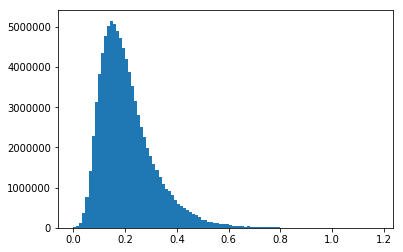

In [74]:
_= plt.hist(distances_165[:].flatten(), bins = 100)

In [ ]:
distances_165 = np.zeros((data_165.shape[0], data_165.shape[0]))
for i in tqdm.tqdm_notebook(range(data_165[:].shape[0])):
    distances_165[i] = np.array([distance.euclidean(data_165[i], x) for x in data_165])

A Jupyter Widget

In [70]:
distances_165

array([[ 0.        ,  0.28886341,  0.27475431, ...,  0.2103007 ,
         0.22426943,  0.23947824],
       [ 0.28886341,  0.        ,  0.31736722, ...,  0.25161979,
         0.21884803,  0.22503744],
       [ 0.27475431,  0.31736722,  0.        , ...,  0.14389139,
         0.25196938,  0.25853596],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [12]:
isomap.fit(data_165)

Isomap(eigen_solver='auto', max_iter=None, n_components=13, n_jobs=1,
    n_neighbors=10, neighbors_algorithm='auto', path_method='auto', tol=0)

In [13]:
data_13 = isomap.transform(data_165)

In [15]:
isomap.reconstruction_error()

0.0079697009132529695

In [18]:
data_785 = np.load("../data/data_785_99.npy")

In [19]:
isomap2 = Isomap(10, 14)

In [20]:
isomap2.fit(data_785)

Isomap(eigen_solver='auto', max_iter=None, n_components=14, n_jobs=1,
    n_neighbors=10, neighbors_algorithm='auto', path_method='auto', tol=0)

In [71]:
isomap3.reconstruction_error()

0.041717712674192949

In [24]:
data_14 = isomap2.transform(data_785)

In [55]:
isomap2.dist_matrix_.mean()

0.62782336470523914

0.098581893900200002

In [65]:
i, j = 1, 6
print(((data_785[i] - data_785[j])**2).sum())
print(((data_14[i] - data_14[j])**2).sum())



0.080773001308
0.338662907863


In [66]:
isomap3 = Isomap(10, 2)

In [68]:
isomap3.fit(data_785)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=10, neighbors_algorithm='auto', path_method='auto', tol=0)

In [69]:
data_2 = isomap3.transform(data_785)

In [73]:
isomap4 = Isomap(10, 2, n_jobs = 32)

In [74]:
isomap4.fit(data_165)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=10, neighbors_algorithm='auto', path_method='auto', tol=0)

In [76]:
data_2_165 = isomap4.transform(data_165)

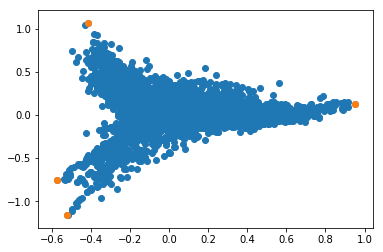

In [131]:
plt.scatter(data_2[::,0], data_2[::, 1])
plt.scatter(data_2[points_of_interest,0], data_2[points_of_interest, 1])

In [190]:
# Test NN 

5


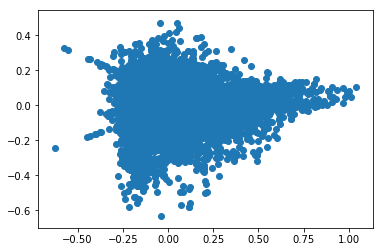

10


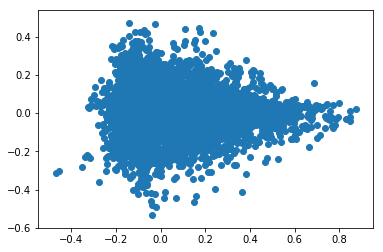

15


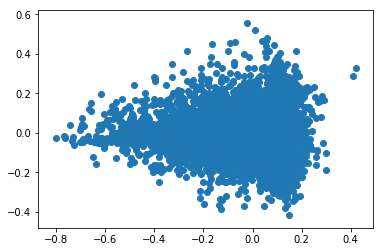

20


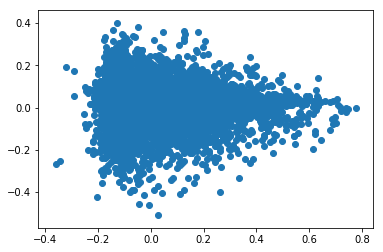

40


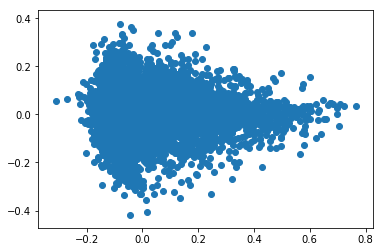

80


KeyboardInterrupt: 

In [192]:
for k in [5, 10, 15, 20, 40, 80]:
    print(k)
    isomap_ = Isomap(k, 2, n_jobs = -1)
    isomap_.fit(data_165)
    data_ = isomap_.transform(data_165)
    
    plt.scatter(data_[::,0], data_[::, 1])
    plt.show()

In [95]:
data = np.load("../data.npy")

In [130]:
max_0 = 5477
min_0 = 8881
max_1 = 802
min_1 = 5926
points_of_interest = np.array([max_0, max_1, min_0, min_1])

In [115]:
rows = set()
for p in points_of_interest:
    rows.update(np.where(data[p] != 0)[0])

In [121]:
rows_of_interest = np.array(sorted(list(rows)))

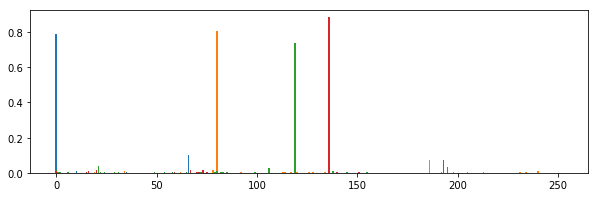

In [133]:
plt.figure(figsize = (10, 3))
for p in points_of_interest:
    plt.bar(np.arange(len(rows_of_interest)),
           data[p][rows_of_interest])

In [174]:
def plot_set_of_points(points_of_interest, n_rows = 100):
    rows = set()
    for p in points_of_interest:
        rows.update(np.where(data[p] != 0)[0])
    rows_of_interest = np.array(sorted(list(rows)))
    
    t = sorted(data[points_of_interest][:, rows_of_interest].sum(0))[::-1][n_rows]
    rows_mask = data[points_of_interest][:, rows_of_interest].sum(0) > t
    
    
    print(len(rows_of_interest), rows_mask.sum())
    plt.figure(figsize = (10, 3))
    for p in points_of_interest:
        plt.bar(np.arange(n_rows),
               data[p][rows_of_interest[rows_mask]])
    
    return rows_of_interest

610 100


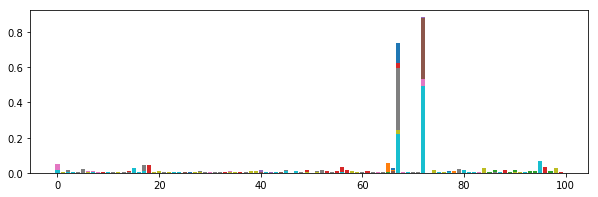

In [175]:
r_o_i = plot_set_of_points(data_2[:, 0].argsort()[:10])

In [179]:
data[data_2[:, 0].argsort()[:10]][:, r_o_i].sum(0).argsort()[::-1]

array([227, 195,   0,  27, 444,  28, 117, 169, 171,   2,  23, 133, 454,
       136,   7, 124, 496, 125,  20, 298,   1,  75, 238, 373, 111,  58,
       311,   8, 119,  55, 233, 107, 329,  91, 121, 240,  10, 135,  16,
       134, 130, 116, 230,  53, 145,  17,  15,  30,  29,   5,  49,  39,
       236, 470, 424, 115,  88, 140,  13,   3,  47, 436, 137, 247,  59,
        82,  40, 231, 132, 120,  26, 255,  72, 299, 211,  14, 423, 122,
       206, 114,  12, 349, 523, 153, 216, 324,  51, 113, 232,  70, 297,
        46,  83, 217, 229, 131, 118,  74, 146, 411, 180,  89,  33, 439,
       222,  37, 360, 350,  50, 126, 498,  69, 152, 138, 421, 239, 599,
       129, 573,  18, 437, 182,  85, 151, 288, 150, 603,  77,  66, 127,
        48, 306,  19, 173,  81, 356, 245, 220, 300,  22, 190, 302, 415,
        41, 139, 185, 189, 369, 285, 325, 154, 176, 215, 331, 493, 202,
       290,   6, 463, 370,  73, 312, 355,  31, 317, 534, 204, 344, 530,
        32,  25, 172, 279, 596, 364, 465, 219, 108,  44,  21, 15

In [137]:
data_2[:, 0].argsort()[:10]

array([8881, 1714, 2388, 8121, 5926, 4162, 8964, 1972, 6457, 8743])

In [188]:
data[8881].argsort()[::-1][:10]

array([ 543,   51, 2855,  492,    3,   50,  623,  340,  339,    5])

In [186]:
data[1714].argsort()[::-1][:10]

array([614, 543, 470,   3, 492, 627,   6, 348,  30, 330])

In [187]:
data[2388].argsort()[::-1][:10]

array([ 614,  543,    3, 1782,  923, 3725, 2747, 2489,  371,  470])

In [189]:
for p in data_2[:, 0].argsort()[:10]:
    print(data[p].argsort()[::-1][:5])

[ 543   51 2855  492    3]
[614 543 470   3 492]
[ 614  543    3 1782  923]
[ 543   51 3018  351  614]
[614 324  50 330   3]
[614   3 492  50 330]
[614 543   3  21   6]
[543 614  50  13 630]
[ 614  543 5135  887  618]
[ 614  543 2855   42    3]


In [ ]:
xv

In [183]:
data[8881].argmax()

543

# LTSA

In [194]:
from sklearn.manifold import LocallyLinearEmbedding

In [195]:
lle = LocallyLinearEmbedding(10, 2, n_jobs = -1)

In [196]:
lle.fit(data_165)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='standard', modified_tol=1e-12, n_components=2,
            n_jobs=1, n_neighbors=10, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

In [197]:
data_lle_2 = lle.transform(data_165)

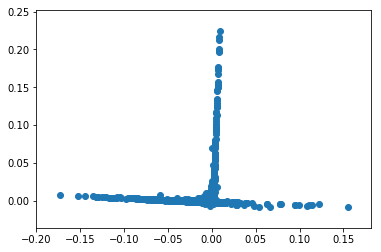

In [198]:
plt.scatter(data_lle_2[::,0], data_lle_2[::, 1])
plt.show()

In [246]:
lle.reconstruction_error_

3.3894103131050256e-07

In [224]:
data_lle_2[:,0].argsort()

array([3655, 8692, 5135, ..., 5640, 8068,  858])

In [201]:
import pandas as pd

In [210]:
ltsa = LocallyLinearEmbedding(10, 2, n_jobs = -1, method='modified')

In [211]:
ltsa.fit(pd.DataFrame(data_165).drop_duplicates().values)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='modified', modified_tol=1e-12, n_components=2,
            n_jobs=-1, n_neighbors=10, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

In [212]:
data_ltsa_2 = ltsa.transform(data_165)

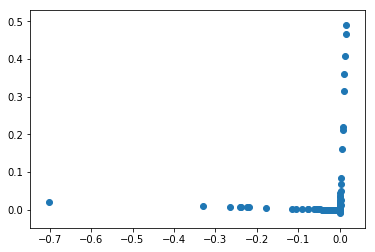

In [213]:
plt.scatter(data_ltsa_2[::,0], data_ltsa_2[::, 1])
plt.show()

In [247]:
ltsa.hessian_tol


0.0001

In [215]:
ltsa30 = LocallyLinearEmbedding(30, 2, n_jobs = -1, method='modified')

In [216]:
ltsa30.fit(pd.DataFrame(data_165).drop_duplicates().values)

LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001, max_iter=100,
            method='modified', modified_tol=1e-12, n_components=2,
            n_jobs=-1, n_neighbors=30, neighbors_algorithm='auto',
            random_state=None, reg=0.001, tol=1e-06)

In [217]:
data_ltsa_2 = ltsa30.transform(data_165)

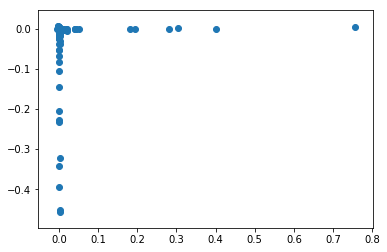

In [218]:
plt.scatter(data_ltsa_2[::,0], data_ltsa_2[::, 1])
plt.show()

In [78]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

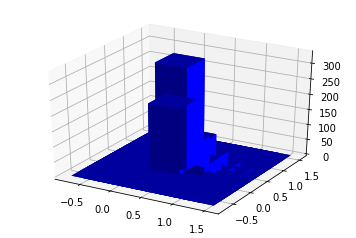

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(data_2_165[::10,0], data_2_165[::10,1], bins=10, range=[[-1, 1], [-1, 1]])

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')

plt.show()

In [91]:
hist.astype(int)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   1,   5,   8,   1,   0,   0,   0],
       [  0,   0,   2,  14, 215, 332,  21,   1,   0,   0],
       [  0,   0,   0,  10, 103,  95,  11,   1,   0,   0],
       [  0,   0,   0,   3,  42,  45,   2,   0,   0,   0],
       [  0,   0,   0,   0,  15,  17,   1,   0,   0,   0],
       [  0,   0,   0,   0,   2,   4,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [80]:
x

array([ 0.51252226,  1.56414272,  1.87201009,  2.70197571,  1.71271883,
        2.39053927,  2.59604599,  0.2946539 ,  2.85455991,  2.76722542,
        1.22234149,  3.72461138,  1.14365828,  1.97617746,  3.67731277,
        0.97656382,  3.08930873,  1.31972196,  1.52732529,  1.69583193,
        2.94025968,  1.14883381,  0.41574803,  3.60159791,  3.49538245,
        1.20630008,  0.16141747,  0.91452009,  0.146815  ,  3.67175283,
        0.40801543,  1.61232873,  2.93256511,  3.67300721,  2.60467093,
        1.19754705,  0.92666568,  2.41302557,  1.42448728,  1.95085197,
        2.05828783,  3.1515367 ,  0.01251488,  0.08065437,  0.86883018,
        3.10413117,  0.8217225 ,  1.04135273,  0.12928189,  3.9359068 ,
        1.9254168 ,  2.85698905,  3.13105718,  2.33280267,  2.48321703,
        3.27015679,  0.78738704,  3.685851  ,  3.34439347,  0.39645191,
        0.47844183,  2.00048935,  1.00103285,  3.67161327,  1.67832379,
        3.84648223,  1.48456803,  1.75621862,  0.58078208,  3.42

In [25]:
x = data_14[0]

In [26]:
x

array([-0.11435003, -0.021096  , -0.024438  ,  0.05476516,  0.10633402,
       -0.01738961,  0.00238085, -0.08010104, -0.04253603,  0.03310806,
        0.00578766,  0.02468209, -0.05653231,  0.04541346])

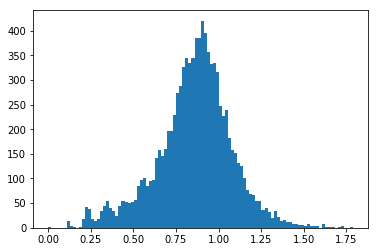

In [40]:
_ = plt.hist(isomap2.dist_matrix_[7], bins = 100, log = 0)

In [41]:
(isomap2.dist_matrix_[7] < 0.25).sum()

119

In [43]:
9500 / 119

79.83193277310924

In [37]:
from sklearn.cluster import KMeans

In [44]:
km = KMeans(80)

In [45]:
km.fit_predict(data_14)

array([17, 30, 27, ..., 24, 68, 71], dtype=int32)

In [46]:
clusters_80 = km.predict(data_14)

In [49]:
km.inertia_

283.45853287886604

In [50]:
c_num = []
for i in tqrange(10, 80, 3):
    km = KMeans(i)
    km.fit(data_14)
    c_num.append(km.inertia_)

757.040613342
525.165108139
430.102529899
379.22882613
345.893135452
320.64635213
299.929114577


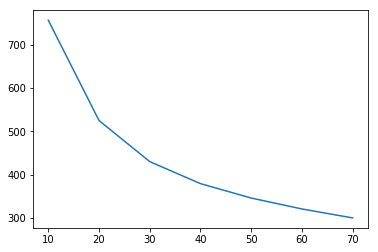

In [221]:
plt.plot(range(10, 80, 10), [757.040613342,
525.165108139,
430.102529899,
379.22882613,
345.893135452,
320.64635213,
299.929114577])

In [228]:
DB_ind_kmeans = np.zeros(80)

for i in range(2, 80):
    km = KMeans(i)
    pred = km.fit_predict(data_14)
    DB_ind_kmeans[i] = DB_index(data_14, km.cluster_centers_, pred)
    
    

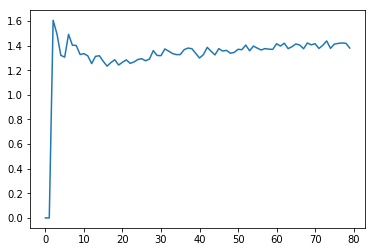

In [229]:
plt.plot(DB_ind_kmeans)

In [231]:
from sklearn.cluster import SpectralClustering

In [244]:
DB_ind_spectral = np.zeros(80)

for i in tqdm.tqdm_notebook(range(2, 30)):
    km = SpectralClustering(i)
    pred = km.fit_predict(data_14)
    centers = cl_centers(data_14, pred, i)
    DB_ind_spectral[i] = DB_index(data_14, centers, pred)
    
    

A Jupyter Widget

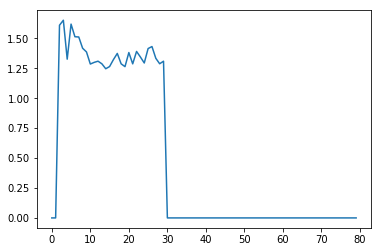

In [245]:
plt.plot(DB_ind_spectral)

array([[ 0.11255914,  0.00452464, -0.01387674,  0.00549251, -0.0027013 ,
        -0.00205046, -0.00181615,  0.00123713, -0.00059782, -0.00471948,
        -0.00574829,  0.00187908,  0.00112773, -0.00145864],
       [-0.29511412, -0.01186296,  0.03638285, -0.01440057,  0.00708241,
         0.00537602,  0.00476168, -0.00324357,  0.0015674 ,  0.0123738 ,
         0.0150712 , -0.00492667, -0.00295674,  0.00382434]])